# Twitter Analysis - Sentiment analysis on Trump's tweets using Python

* Based on ["Sentiment analysis on Trump's tweets using Python"](https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-); And in [Github](https://github.com/RodolfoFerro/pandas_twitter)

## 1. Extracting twitter data (tweepy + pandas)

### 1.1. Importing our libraries

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.2. Creating a Twitter App
Create file credentials.py, which includes keys and tokens from twitter: Consumer Key (API Key), Consumer Secret (API Secret), Access Token, Access Token Secret. 

The reason of creating this extra file is that we want to export only the value of this variables, but being unseen in our main code (our notebook). We are now able to consume Twitter's API. In order to do this, we will create a function to allow us our keys authentication.

In [2]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

## 1.3. Tweets extraction
Now that we've created a function to setup the Twitter API, we can use this function to create an "extractor" object. After this, we will use Tweepy's function extractor.user_timeline(screen_name, count) to extract from screen_name's user the quantity of count tweets.

As it is mentioned in the title, I've chosen @realDonaldTrump as the user to extract data for a posterior analysis.

In [3]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Thank you! https://t.co/TD0rYcWN8C

We had a wonderful visit to Vietnam, thank you President Tran Dai Quang! Heading to the #ASEANSummit 50th Anniv Gal… https://t.co/s5gIKMqt50

Just landed in the Philippines after a great day of meetings and events in Hanoi, Vietnam! https://t.co/YxHRNhhPWo

Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so… https://t.co/PmsWNkH4r4

Does the Fake News Media remember when Crooked Hillary Clinton, as Secretary of State, was begging Russia to be our… https://t.co/0QnLU03c03



## 1.4. Creating a (pandas) DataFrame

In [4]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Thank you! https://t.co/TD0rYcWN8C
1,"We had a wonderful visit to Vietnam, thank you..."
2,Just landed in the Philippines after a great d...
3,Why would Kim Jong-un insult me by calling me ...
4,Does the Fake News Media remember when Crooked...
5,When will all the haters and fools out there r...
6,Met with President Putin of Russia who was at ...
7,Will be doing a joint press conference in Hano...
8,President Xi of China has stated that he is up...
9,“Presidential Proclamation Commemorating the 5...


An interesting thing is the number of internal methods that the tweetstructure has in Tweepy:

In [5]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


The interesting part from here is the quantity of metadata contained in a single tweet. If we want to obtain data such as the creation date, or the source of creation, we can access the info with this attributes. An example is the following:

In [6]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

929717762422988801
2017-11-12 14:29:22
Twitter for iPhone
32150
5925
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/TD0rYcWN8C', 'expanded_url': 'https://twitter.com/usembassymanila/status/929684767087378432', 'display_url': 'twitter.com/usembassymanil…', 'indices': [11, 34]}]}


## 1.5. Adding relevant info to our dataframe

In [7]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [8]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Thank you! https://t.co/TD0rYcWN8C,34,929717762422988801,2017-11-12 14:29:22,Twitter for iPhone,32150,5925
1,"We had a wonderful visit to Vietnam, thank you...",140,929670192434745344,2017-11-12 11:20:20,Twitter for iPhone,35107,6811
2,Just landed in the Philippines after a great d...,114,929655283181391874,2017-11-12 10:21:06,Twitter for iPhone,47290,7668
3,Why would Kim Jong-un insult me by calling me ...,140,929511061954297857,2017-11-12 00:48:01,Twitter Web Client,454114,210493
4,Does the Fake News Media remember when Crooked...,140,929509950811881472,2017-11-12 00:43:36,Twitter Web Client,92186,22915
5,When will all the haters and fools out there r...,140,929503641014112256,2017-11-12 00:18:32,Twitter Web Client,132481,33603
6,Met with President Putin of Russia who was at ...,140,929503025512693760,2017-11-12 00:16:05,Twitter Web Client,60709,12962
7,Will be doing a joint press conference in Hano...,117,929492850101940225,2017-11-11 23:35:39,Twitter for iPhone,49065,8588
8,President Xi of China has stated that he is up...,139,929492038231429120,2017-11-11 23:32:25,Twitter for iPhone,63898,13820
9,“Presidential Proclamation Commemorating the 5...,137,929326786709807105,2017-11-11 12:35:46,Twitter for iPhone,50553,11202


## 2. Visualization and basic statistics

### 2.1. Averages and popularity

In [9]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 122.635


In [10]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so… https://t.co/PmsWNkH4r4
Number of likes: 454114
140 characters.

The tweet with more retweets is: 
Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so… https://t.co/PmsWNkH4r4
Number of retweets: 210493
140 characters.



### 2.2. Time series

In [11]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

In [12]:
tlen

Date
2017-11-12 14:29:22     34
2017-11-12 11:20:20    140
2017-11-12 10:21:06    114
2017-11-12 00:48:01    140
2017-11-12 00:43:36    140
2017-11-12 00:18:32    140
2017-11-12 00:16:05    140
2017-11-11 23:35:39    117
2017-11-11 23:32:25    139
2017-11-11 12:35:46    137
2017-11-11 12:11:53    140
2017-11-10 12:57:23    136
2017-11-10 10:43:48    139
2017-11-10 10:26:22    140
2017-11-10 10:06:37    140
2017-11-10 09:50:25    140
2017-11-10 09:32:07    140
2017-11-10 05:45:36     64
2017-11-10 01:17:15    140
2017-11-09 23:44:17    140
2017-11-09 23:39:56    140
2017-11-09 13:58:32    140
2017-11-09 07:08:33    140
2017-11-08 18:17:41    140
2017-11-08 15:40:40    140
2017-11-08 15:15:08    140
2017-11-08 14:27:18    140
2017-11-08 04:57:40    107
2017-11-08 03:43:59    136
2017-11-08 03:14:34    140
                      ... 
2017-10-26 03:33:41     83
2017-10-26 01:47:50    128
2017-10-26 01:26:05    143
2017-10-25 22:46:57     90
2017-10-25 22:17:36    144
2017-10-25 19:56:39    

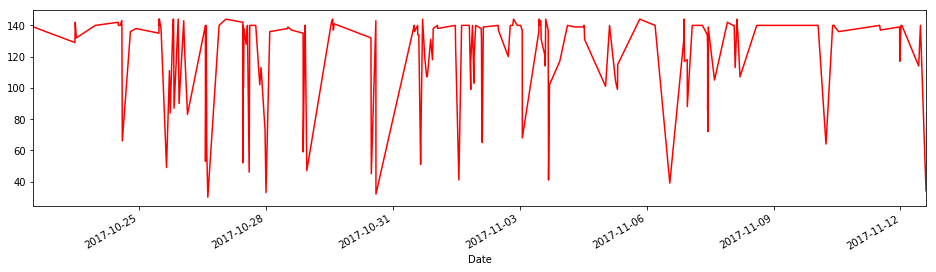

In [13]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

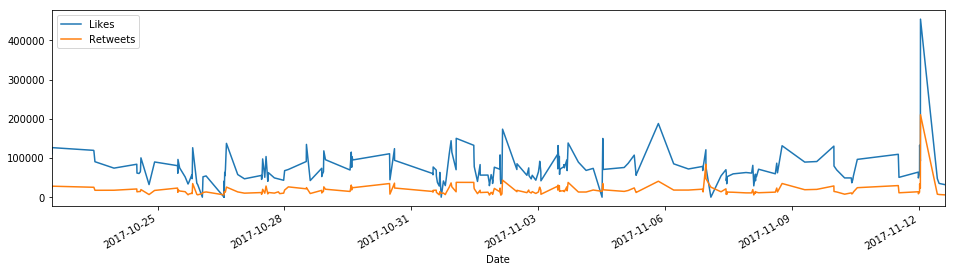

In [14]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

### 2.3. Pie charts of sources

In [15]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Web Client
* Media Studio
* Twitter for iPad


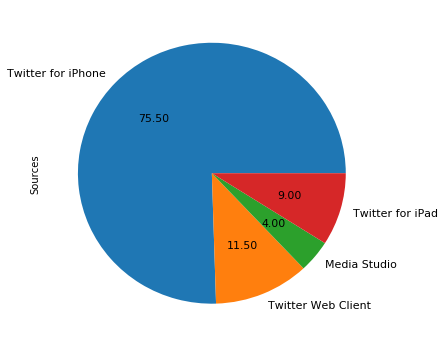

In [16]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [17]:
count_by_source = data.groupby('Source').size()

My way - simple and easier way

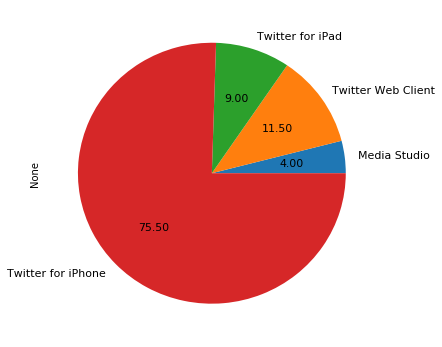

In [18]:
count_by_source.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

## 3. Sentiment analysis

### 3.1. Importing textblob

As we mentioned at the beginning of this post, textblob will allow us to do sentiment analysis in a very simple way. We will also use the re library from Python, which is used to work with regular expressions. For this, I'll provide you two utility functions to: a) clean text (which means that any symbol distinct to an alphanumeric value will be remapped into a new one that satisfies this condition), and b) create a classifier to analyze the polarity of each tweet after cleaning the text in it. I won't explain the specific way in which the function that cleans works, since it would be extended and it might be better understood in the official redocumentation.

In [19]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [20]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Thank you! https://t.co/TD0rYcWN8C,34,929717762422988801,2017-11-12 14:29:22,Twitter for iPhone,32150,5925,0
1,"We had a wonderful visit to Vietnam, thank you...",140,929670192434745344,2017-11-12 11:20:20,Twitter for iPhone,35107,6811,1
2,Just landed in the Philippines after a great d...,114,929655283181391874,2017-11-12 10:21:06,Twitter for iPhone,47290,7668,1
3,Why would Kim Jong-un insult me by calling me ...,140,929511061954297857,2017-11-12 00:48:01,Twitter Web Client,454114,210493,1
4,Does the Fake News Media remember when Crooked...,140,929509950811881472,2017-11-12 00:43:36,Twitter Web Client,92186,22915,-1
5,When will all the haters and fools out there r...,140,929503641014112256,2017-11-12 00:18:32,Twitter Web Client,132481,33603,1
6,Met with President Putin of Russia who was at ...,140,929503025512693760,2017-11-12 00:16:05,Twitter Web Client,60709,12962,1
7,Will be doing a joint press conference in Hano...,117,929492850101940225,2017-11-11 23:35:39,Twitter for iPhone,49065,8588,0
8,President Xi of China has stated that he is up...,139,929492038231429120,2017-11-11 23:32:25,Twitter for iPhone,63898,13820,1
9,“Presidential Proclamation Commemorating the 5...,137,929326786709807105,2017-11-11 12:35:46,Twitter for iPhone,50553,11202,0


### 3.2. Analyzing the results

In [21]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [22]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 53.5%
Percentage of neutral tweets: 23.5%
Percentage de negative tweets: 23.0%


In [24]:
data.groupby('SA').size() / 200

SA
-1    0.230
 0    0.235
 1    0.535
dtype: float64